In [1]:
import datetime

import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
def importdata():
    dataframe = pd.read_csv('../data/df_points_18-19-20-21_v1_weather_final.csv')
    return dataframe.sort_values(by=['dt_start'])

# Main

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# read CSV
df = pd.read_csv('../data/df_points_18_21_v1_new_features.csv')

In [2]:
# event del Index Column
del df['Unnamed: 0']
df['idle_time'] = df['timestood'].copy()
del df['timestood']
df = df.sort_values(by='dt_start', ignore_index=True)
df.head()

,bike_id,lat,lng,temp,rain,snow,dt_start,dt_end,hex_enc,start_min,idle_time
0,3694,51.323619,12.335887,10.80,0.0,0.0,1514764029,1514764799,324,1427.15,12
1,2508,51.323619,12.335887,10.80,0.0,0.0,1514764035,1514764799,324,1427.25,12
2,41851,51.332415,12.395158,10.80,0.0,0.0,1514764638,1514764799,137,1437.30,2
3,2508,51.323619,12.335887,10.86,0.0,0.0,1514764800,1514851199,324,0.00,1439
4,3694,51.323619,12.335887,10.86,0.0,0.0,1514764800,1514814103,324,0.00,821


In [3]:
#add classification target
def f(row):
    if row['idle_time'] < 360:
        val = 1
    elif row['idle_time'] < 720:
        val = 2
    elif row['idle_time'] < 1080:
        val = 3
    else:
        val = 4
    return val

df['idle_time_class'] = df.apply(f, axis=1)

In [4]:
df.head()

,bike_id,lat,lng,temp,rain,snow,dt_start,dt_end,hex_enc,start_min,idle_time,idle_time_class
0,3694,51.323619,12.335887,10.80,0.0,0.0,1514764029,1514764799,324,1427.15,12,1
1,2508,51.323619,12.335887,10.80,0.0,0.0,1514764035,1514764799,324,1427.25,12,1
2,41851,51.332415,12.395158,10.80,0.0,0.0,1514764638,1514764799,137,1437.30,2,1
3,2508,51.323619,12.335887,10.86,0.0,0.0,1514764800,1514851199,324,0.00,1439,4
4,3694,51.323619,12.335887,10.86,0.0,0.0,1514764800,1514814103,324,0.00,821,3


In [36]:
df['idle_time_class'].count()

2435439

In [7]:
df.to_csv('../data/df_points_18_21_v1_new_features.csv',index=False)

In [5]:
TargetVariable=['idle_time_class']
Predictors=['bike_id', 'lat', 'lng', 'temp', 'rain', 'snow', 'dt_start','hex_enc','start_min']

In [11]:
X=df[Predictors].values
y=df[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
#TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
#y=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1948351, 9)
(1948351, 1)
(487088, 9)
(487088, 1)



# MLPClassification

Iteration 1, loss = 0.71823338
Validation score: 0.701246
Iteration 2, loss = 0.68009923
Validation score: 0.701518
Iteration 3, loss = 0.67627152
Validation score: 0.703304
Iteration 4, loss = 0.67448888
Validation score: 0.702350
Iteration 5, loss = 0.67315684
Validation score: 0.702375
Iteration 6, loss = 0.67201987
Validation score: 0.703335
Iteration 7, loss = 0.67130401
Validation score: 0.703402
Iteration 8, loss = 0.67068876
Validation score: 0.704105
Iteration 9, loss = 0.67000262
Validation score: 0.703099
Iteration 10, loss = 0.66940740
Validation score: 0.704552
Iteration 11, loss = 0.66886497
Validation score: 0.704043
Iteration 12, loss = 0.66786653
Validation score: 0.704813
Iteration 13, loss = 0.66616023
Validation score: 0.706050
Iteration 14, loss = 0.66480086
Validation score: 0.703735
Iteration 15, loss = 0.66326838
Validation score: 0.706738
Iteration 16, loss = 0.66093888
Validation score: 0.706030
Iteration 17, loss = 0.65880519
Validation score: 0.709073
Iterat

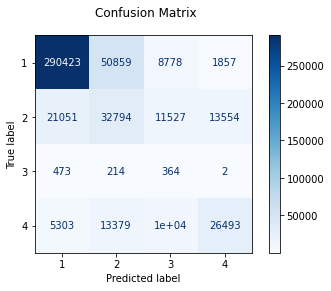

In [38]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cls = MLPClassifier(hidden_layer_sizes=(10,15,10), activation='relu', solver='adam', max_iter=1000, verbose=1, early_stopping=True)
cls.fit(X_train,y_train.ravel())

expected_y = y_test
predicted_y = cls.predict(X_test)

print(cls.score(X_test, y_test))

fig = ConfusionMatrixDisplay.from_predictions(predicted_y,expected_y,cmap=plt.cm.Blues)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [39]:
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(expected_y, predicted_y)

explained_variance:  0.3044
r2:  0.2976
MAE:  0.385
MSE:  0.6217
RMSE:  0.7885


# RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train.ravel())

rf_y_pred = rfc.predict(X_test)

rfc.score(X_test,y_test)

fig = ConfusionMatrixDisplay.from_predictions(rf_y_pred,expected_y,cmap=plt.cm.Blues)
fig.figure_.suptitle("Confusion Matrix RandomForestClassifier")
plt.show()

0.74542177183589

In [30]:
import pandas as pd

feature_imp = pd.Series(rfc.feature_importances_,index=Predictors).sort_values(ascending=False)
feature_imp

start_min    0.285166
lat          0.141118
lng          0.138578
dt_start     0.135651
bike_id      0.124480
temp         0.123004
hex_enc      0.034443
rain         0.016844
snow         0.000717
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


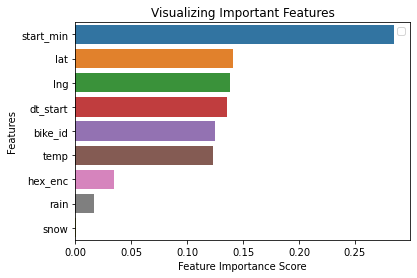

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Gridsearch
# RandomForestRegressor

In [10]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [11]:
from sklearn.metrics import make_scorer

def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

model = RandomForestRegressor()
param_search = {
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)],
    'verbose' : [1]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train.ravel())
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   15.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
y_true = y_test
y_pred = best_model.predict(X_test)

regression_results(y_true, y_pred)

In [ ]:
imp = best_model.feature_importances_
X_train = pd.DataFrame(X_train,columns=Predictors)
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# inverse transformation y_test y_pred

In [58]:
# transform back
#X_back = PredictorScalerFit.inverse_transform(X)
predicted_y = predicted_y.reshape(-1, 1)
#y_real_back = TargetVarScalerFit.inverse_transform(y_test)
#y_pred_back =  TargetVarScalerFit.inverse_transform(predicted_y)

In [59]:
#result_compare = pd.DataFrame(y_real_back,columns=['real'])

In [61]:
#result_compare['pred'] = y_pred_back

In [62]:
#result_compare

,real,pred
0,648.0,1144.472840
1,38.0,120.372312
2,1439.0,865.256972
3,268.0,865.532030
4,902.0,300.368490
...,...,...
487083,498.0,272.307613
487084,82.0,241.258410
487085,175.0,348.363753
487086,306.0,259.579036
